### Active region on the surface of a comet nucleus rotating around the spin axis of the nucleus.



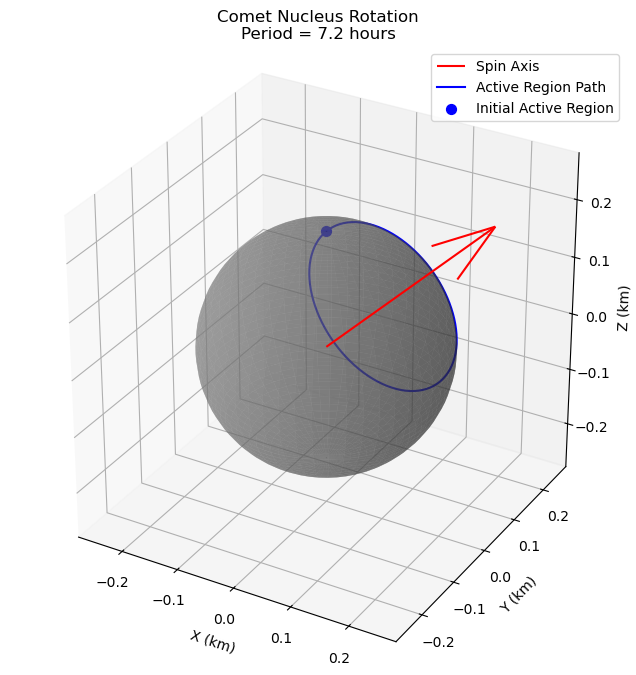

Ellipsoid semi-axes (km) - irregular shape (a,b,c): (0.2, 0.2, 0.2) km
Spin Axis: [0.707 0.    0.707]
Rotational Period: 7.2 hours
Initial Active Region Position: [0.  0.  0.2]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

# Parameters
a, b, c = 0.2, 0.2, 0.2  # Ellipsoid semi-axes (km) - irregular shape
period = 7.2  # Rotational period (hours)
spin_axis = np.array([0.707, 0.0, 0.707])  # Spin vector (e.g., 45° from z-axis)
omega = 2 * np.pi / period  # Angular velocity (radians/hour)

# Time array for simulation (e.g., one full rotation)
t = np.linspace(0, period, 100)  # Time steps (hours)

# Define the active region’s initial position on the surface (in body-fixed frame)
# Example: Near "equator" of ellipsoid
theta0, phi0 = np.pi / 4, np.pi /4  # Spherical coords (radians)
theta0, phi0 =0, 0  # Spherical coords (radians)
r0 = np.array([
    a * np.sin(theta0) * np.cos(phi0),
    b * np.sin(theta0) * np.sin(phi0),
    c * np.cos(theta0)
])

# Function to generate ellipsoid surface points for visualization
def ellipsoid_surface(a, b, c, n=50):
    u = np.linspace(0, 2 * np.pi, n)
    v = np.linspace(0, np.pi, n)
    x = a * np.outer(np.cos(u), np.sin(v))
    y = b * np.outer(np.sin(u), np.sin(v))
    z = c * np.outer(np.ones(n), np.cos(v))
    return x, y, z

# Simulate rotation and track active region
positions = []
for ti in t:
    # Rotation angle at time ti
    angle = omega * ti  # Radians
    # Rotation object around spin axis
    rot = Rotation.from_rotvec(angle * spin_axis)
    # Rotate the active region’s initial position
    r_t = rot.apply(r0)
    positions.append(r_t)
positions = np.array(positions)

# Set up 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the comet nucleus (ellipsoid)
x, y, z = ellipsoid_surface(a, b, c)
ax.plot_surface(x, y, z, color='gray', alpha=0.5, rstride=1, cstride=1)

# Plot the spin axis
ax.quiver(0, 0, 0, spin_axis[0], spin_axis[1], spin_axis[2],  length=.4, arrow_length_ratio=0.1,color='r', label='Spin Axis')

# Plot the active region’s trajectory
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'b-', label='Active Region Path')
ax.scatter([r0[0]], [r0[1]], [r0[2]], color='blue', s=50, label='Initial Active Region')

# Set equal aspect ratio (approximate)
ax.set_box_aspect([a, b, c])  # Roughly match ellipsoid shape
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title(f'Comet Nucleus Rotation\nPeriod = {period} hours')
ax.legend()

# Adjust limits
max_range = max(a, b, c) * 1.4
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)
ax.set_zlim(-max_range, max_range)
ax.set_box_aspect([1, 1, 1])

plt.show()

# Optional: Print some info
print(f"Ellipsoid semi-axes (km) - irregular shape (a,b,c): {a, b, c} km")
print(f"Spin Axis: {spin_axis}")
print(f"Rotational Period: {period} hours")
print(f"Initial Active Region Position: {r0}")
